

# Project: Investigate a Dataset - [TMDB-Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This project seeks to analyse data from the tmdb movies data. The data set contains information about 10,000 movies collected from The Movie Database (TMDb), The dataset contains the underlisted columns/variables;

* popularity

* production_companies
* Revenue
* Budget
* Release_year
* vote_count etc.


### Question(s) for Analysis
This will the questions that will be answered in the project;
* What is the correlation between Revenue and some of the varabbles in the dataset(Bugdet,Popularity,Vote count)
* Which person has directed a lot of movies
* Does Year of release has some kind of effect on Revenue

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('ggplot')
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



In [19]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [20]:
df.shape

(10866, 21)

In [21]:
#Getting information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [22]:
#checking for missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [23]:
#checking for duplicated values 
df.duplicated().sum()

1


### Data Cleaning
From inspecting the data set above we realise that there are a lot of missing values in it with the ` homepage ` column recording the highest number of missing rows. we will drop unnecessary columns with missing values and then drop all rows with missing values.We will also drop all duplicated rows in the dataset.
The ` release_date ` column will also  be changed into a datetime object which will be suitable for analysis
 

In [24]:
#drop any unnecessary variable with missing values more than 50% and then drop any other rows with missing values
df.drop(['homepage','tagline','keywords'],inplace=True,axis=1) 
df.dropna(inplace=True)
df.isnull().sum()


id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [25]:
#drop duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [26]:
#converting release year and release date to datetime
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].dtypes

dtype('<M8[ns]')

In [27]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9770.000000,9770.000000,9.770000e+03,9.770000e+03,9770.000000,9770.000000,9770.000000,9770.000000,9.770000e+03,9.770000e+03
mean,63190.584033,0.694775,1.618298e+07,4.424026e+07,102.939611,239.353224,5.963388,2000.876766,1.941997e+07,5.706477e+07
std,90725.204030,1.037027,3.221320e+07,1.225998e+08,27.865500,603.066348,0.913207,13.037610,3.566891e+07,1.514632e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10220.500000,0.232619,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.179631e+05,0.000000e+00
75%,70541.750000,0.776465,1.936250e+07,3.105779e+07,112.000000,173.000000,6.600000,2011.000000,2.467646e+07,4.312856e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

We intend to explore the dataset through summary statistics and visualisations to find hidden patterns in the dataset to enable us to answer our research questions.


### Research Question 1 (What is the correlation between Revenue and some of the varabbles in the dataset(Bugdet,Popularity,Vote count ) )

In [28]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9770.000000,9770.000000,9.770000e+03,9.770000e+03,9770.000000,9770.000000,9770.000000,9770.000000,9.770000e+03,9.770000e+03
mean,63190.584033,0.694775,1.618298e+07,4.424026e+07,102.939611,239.353224,5.963388,2000.876766,1.941997e+07,5.706477e+07
std,90725.204030,1.037027,3.221320e+07,1.225998e+08,27.865500,603.066348,0.913207,13.037610,3.566891e+07,1.514632e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10220.500000,0.232619,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.179631e+05,0.000000e+00
75%,70541.750000,0.776465,1.936250e+07,3.105779e+07,112.000000,173.000000,6.600000,2011.000000,2.467646e+07,4.312856e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


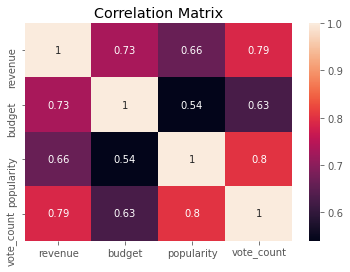

In [29]:
df_corr=df[['revenue','budget','popularity','vote_count']].corr()
sns.heatmap(df_corr,annot=True)
plt.title('Correlation Matrix');

In [31]:
#defining a scatter plot function to avoid repetition of codes
def scatter(x,y,title,xlabel,ylabel):
    plt.scatter(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()

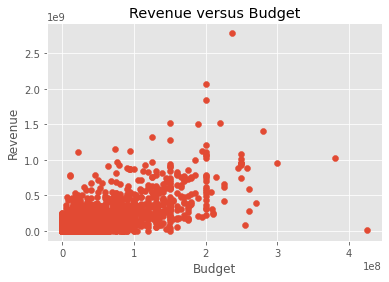

In [32]:
# Scatter plot of revenue and budget
scatter(df['budget'],df['revenue'],'Revenue versus Budget','Budget','Revenue')

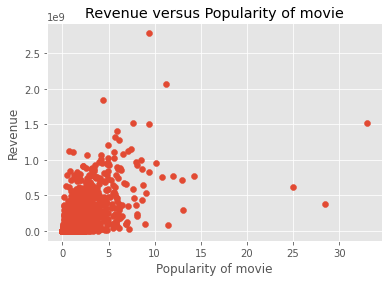

In [33]:
#Scatter plot of revenue and popularity
scatter(df['popularity'],df['revenue'],'Revenue versus Popularity of movie','Popularity of movie','Revenue')

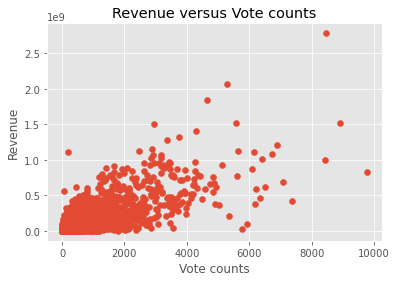

In [34]:
#Scatter plot of revenue and vote counts
scatter(df['vote_count'],df['revenue'],'Revenue versus Vote counts','Vote counts','Revenue')

Fom the correlation plot and the scatter plots above you will realise that  Revenue has a strong postive correlation with Budget, Popularity, Vote counts with a coefficient of 0.73, 0.66, 0.79 respectively

### Research Question 2  (Which person has directed a lot of movies)

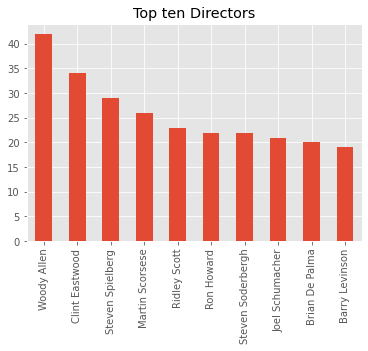

In [16]:
df['director'].value_counts()[:10].plot(kind='bar',title='Top ten Directors');


From the barplot above, the director with the highest number of movies is ` Woody Allen ` with more than 40 movies to his credit

### Research Question 3 (Does Year of release has some kind of effect on Revenue)

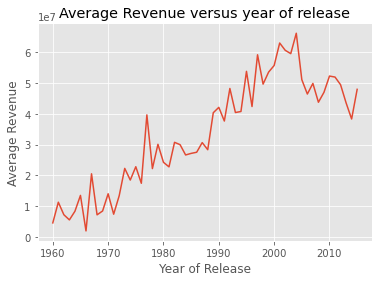

In [17]:
df.groupby('release_year')['revenue'].mean().plot()
plt.title('Average Revenue versus year of release' )
plt.xlabel('Year of Release')
plt.ylabel('Average Revenue');

From the diagram above, Average revenue of a movie produced in year had an upward trend from ` 1960` and decreased from somewhere in the mid ` 2000's `

<a id='conclusions'></a>
## Conclusions
From the analysis above, we conclude that;
* Revenue has a strong postive correlation with Budget, Popularity, Vote counts.
* The most popular director is ` Woody Allen `
* Average revenue of a movie produced in year had an upward trend from ` 1960` and decreased from somewhere in the mid ` 2000's `